In [1]:
import numpy as np
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)    

Want to constrain mobility in soils by outlet fit. 

Does the **variable model** allow us to see the constraint effects (on Kd and DT50), when constrained by the outlet? 

In [3]:
df1 = get_data(gen="Gen1")
# df2 = get_data(gen="Gen2")
# df3 = get_data(gen="Gen3")
# df4 = get_data(gen="Gen4")

df = pd.concat([df1])

In [4]:
'LHS_e1var7/1/' in df.index

True

In [5]:
df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']
# Combined outlet and transects KGE Concentrations and d13C
df['KGE-SM'] = (df.loc[:, 'KGE-CONC_out'] + df.loc[:, 'KGE-CONC-tra'])/2.0  
df['KGE-d13C'] = (df.loc[:, 'KGE-d13C_out'] + df.loc[:, 'KGE-d13C-tra'])/2.0

isocst = 0.5
df['Constraint'] = df.apply(IsoKGE, args=(isocst,), axis=1)

In [6]:
print("Maximum Conc.")
print(df['KGE-CONC-tra'].max(), df['KGE-CONC_out'].max(), df['KGE-SM'].max()) 
print("Maximum d13C")
print(df['KGE-d13C-tra'].max(), df['KGE-d13C_out'].max(), df['KGE-d13C'].max()) 

Maximum Conc.
(0.712486405538371, 0.36008130938978367, 0.49304560188187874)
Maximum d13C
(0.9031088875320538, 0.70432567774303, 0.7895610427604134)


In [7]:
dfs = df[['Model', 'K_d', 'dt_50_ref', 'k_oc', 'f_oc',
          'KGE-CONC-tra' , 
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-LDS_out',
          'KGE-d13C-tra', 'KGE-d13C_out',
          'KGE-SM', 'KGE-d13C', 'Constraint'
         ]]

Filter for good concentrations

In [22]:
# Filter
ff = dfs.loc[(dfs['KGE-SM'] > 0.30)] # Try 25 with more data points
ff_c = ff.loc[(ff['KGE-d13C'] > isocst)]
print(len(dfs), len(ff), len(ff_c))

fix_num = len(dfs.loc[dfs['Model']== 'fix'])
var_num = len(dfs.loc[dfs['Model']== 'var'])

fix_passed = len(ff.loc[ff['Model']== 'fix'])
var_passed = len(ff.loc[ff['Model']== 'var'])

f_fix = round(float(fix_passed)/fix_num, 3)
f_var = round(float(var_passed)/var_num, 3)
print(fix_num, var_num)
print(f_fix, f_var)
print(f_fix*fix_num, f_var*var_num)

(9802, 390, 50)
(4377, 5425)
(0.031, 0.047)
(135.687, 254.975)


In [24]:
print("Maximum Conc.")
print(ff['KGE-CONC-tra'].max(), ff['KGE-CONC_out'].max(), ff['KGE-SM'].max()) 
print("Maximum d13C")
print(ff['KGE-d13C-tra'].max(), ff['KGE-d13C_out'].max(), ff['KGE-d13C'].max()) 

Maximum Conc.
(0.7120090175402247, 0.3166693640157219, 0.49304560188187874)
Maximum d13C
(0.9020686763041016, 0.4959597670710506, 0.6648114541771115)


Set color bar and axes ranges 

In [49]:
vmin, vmax = ff['KGE-SM'].min()* .9, ff['KGE-SM'].max() * 1.05
cmap = sns.diverging_palette(10, 240, l=65, center="light", as_cmap=True)
# cmap = sns.diverging_palette(275, 150, s=80, l=55, center="dark", as_cmap=True)

xmin, xmax = ff['KGE-CONC_out'].min() * .9, ff['KGE-CONC_out'].max() * 1.1
ymin, ymax = ff['KGE-CONC-tra'].min() * .9, ff['KGE-CONC-tra'].max() * 1.05

In [53]:
ff.tail()

,Model,K_d,dt_50_ref,k_oc,f_oc,KGE-CONC-tra,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint
LHS_sc1var7/54/,var,74.172732,11.487753,4594.261014,0.016145,0.696424,0.504805,0.177112,-1.255463,0.411957,0.077890,0.436768,0.244924,KGE-d13C < 0.5
LHS_sc1var7/62/,var,19.479190,14.667134,972.918180,0.020021,0.553869,0.683318,0.063828,-0.318149,-0.164745,-0.134301,0.308848,-0.149523,KGE-d13C < 0.5
LHS_sc1var7/67/,var,5.141923,20.677490,266.051915,0.019327,0.661445,0.691220,0.106108,-3.110810,0.898338,0.388445,0.383776,0.643392,KGE-d13C > 0.5
LHS_sc1var7/68/,var,44.094794,17.455945,1870.411673,0.023575,0.621652,0.666745,0.172353,-2.605406,0.862330,-1.815061,0.397003,-0.476366,KGE-d13C < 0.5
LHS_sc1var7/69/,var,3.684672,11.205192,148.822499,0.024759,0.626138,0.258164,0.080462,-4.425526,0.830904,-2.591804,0.353300,-0.880450,KGE-d13C < 0.5


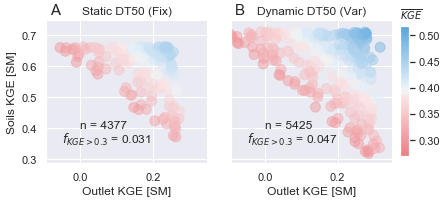

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.FacetGrid(ff, col='Model', palette='viridis')
g = g.map(facet_scatter, 'KGE-CONC_out', 'KGE-CONC-tra', "KGE-SM",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap) #.add_legend()

g.axes[0,0].set_ylim(ymin, ymax)
g.axes[0,1].set_ylim(ymin, ymax)
g.axes[0,0].set_xlim(xmin, xmax) # left plot
g.axes[0,1].set_xlim(xmin, xmax) # right plot

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

ax0 = g.axes[0, 0]
ax1 = g.axes[0, 1]

ax0.annotate('n = ' + str(fix_num),
            xy=(0, 0.4), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax0.annotate('$f_{KGE > 0.3}$ = ' + str(f_fix),
            xy=(-.05, 0.35), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax0.set_xlabel("Outlet KGE [SM]")
ax0.set_ylabel("Soils KGE [SM]")

ax0.set_title("Static DT50 (Fix)")
ax1.set_title("Dynamic DT50 (Var)")

ax0.annotate('A', fontsize=15,
            xy=(50, 190), xycoords='figure pixels')
ax1.annotate('B', fontsize=15,
            xy=(235, 190), xycoords='figure pixels')

ax1.annotate('$\overline{KGE}$', fontsize=10,
            xy=(400, 185), xycoords='figure pixels')

ax1.annotate('n = ' + str(var_num),
            xy=(0, 0.4), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax1.annotate('$f_{KGE > 0.3}$ = ' + str(f_var),
            xy=(-.05, 0.35), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax1.set_xlabel("Outlet KGE [SM]")

# ax1.annotate('No equifinality \nat low DT50', 
#             xy=(15, 70), xycoords='data',
#             xytext=(-20, 20), textcoords='offset points',
#             arrowprops=dict(arrowstyle="->", color='grey'))

# Draw the colorbar
g.fig.colorbar(points, cax=cax)
# g.savefig("Fig3_MvsM.pdf")

# https://matplotlib.org/examples/pylab_examples/annotation_demo2.html

In [45]:
vmin, vmax = ff_c['KGE-d13C'].min(), ff_c['KGE-d13C'].max()
cmap = sns.diverging_palette(10, 240, l=65, center="light", as_cmap=True)
# cmap = sns.diverging_palette(275, 150, s=80, l=55, center="dark", as_cmap=True)

xmin, xmax = ff_c['KGE-d13C_out'].min() * .90, ff_c['KGE-d13C_out'].max() * 1.05
ymin, ymax = ff_c['KGE-d13C-tra'].min() * 0.90, ff_c['KGE-d13C-tra'].max() * 1.05

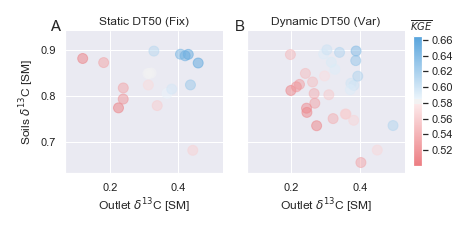

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.FacetGrid(ff_c, col='Model', palette='viridis')
g = g.map(facet_scatter, 'KGE-d13C_out', 'KGE-d13C-tra', "KGE-d13C",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap) #.add_legend()

# g.axes[0,0].set_ylim(ymin, ymax)
# g.axes[0,1].set_ylim(ymin, ymax)
# g.axes[0,0].set_xlim(xmin, xmax) # left plot
# g.axes[0,1].set_xlim(xmin, xmax) # right plot

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

ax0 = g.axes[0, 0]
ax1 = g.axes[0, 1]

ax0.annotate('n = ' + str(fix_num),
            xy=(0, 0.4), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax0.annotate('$f_{KGE > 0.3}$ = ' + str(f_fix),
            xy=(-.05, 0.35), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax0.set_xlabel("Outlet $\delta ^{13}$C [SM]")
ax0.set_ylabel("Soils $\delta ^{13}$C [SM]")

ax0.set_title("Static DT50 (Fix)")
ax1.set_title("Dynamic DT50 (Var)")

ax0.annotate('A', fontsize=15,
            xy=(50, 200), xycoords='figure pixels')
ax1.annotate('B', fontsize=15,
            xy=(235, 200), xycoords='figure pixels')

ax1.annotate('$\overline{KGE}$', fontsize=10,
            xy=(410, 200), xycoords='figure pixels')

ax1.annotate('n = ' + str(var_num),
            xy=(0, 0.4), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax1.annotate('$f_{KGE > 0.3}$ = ' + str(f_var),
            xy=(-.05, 0.35), xycoords='data',
            xytext=(0, 0), textcoords='offset points')

ax1.set_xlabel("Outlet $\delta ^{13}$C [SM]")

# ax1.annotate('No equifinality \nat low DT50', 
#             xy=(15, 70), xycoords='data',
#             xytext=(-20, 20), textcoords='offset points',
#             arrowprops=dict(arrowstyle="->", color='grey'))

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

## Using Joint Plot

In [12]:
ff.head(2)

,Model,K_d,dt_50_ref,k_oc,f_oc,KGE-CONC-tra,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint
LHS_be1fix3/128/,fix,53.882385,14.321159,5052.896261,0.010664,0.640758,0.553092,0.198164,-0.817553,-1.057900,-1.299290,0.419461,-1.178595,KGE-d13C < 0.6
LHS_be1fix3/195/,fix,176.576889,15.819540,13233.590577,0.013343,0.585501,0.563031,0.043148,-0.032746,-0.867323,-0.461787,0.314324,-0.664555,KGE-d13C < 0.6


In [13]:
xmin, xmax = ff['KGE-CONC_out'].min() * .90, ff['KGE-CONC_out'].max() * 1.05
ymin, ymax = ff['KGE-CONC-tra'].min() * 0.90, ff['KGE-CONC-tra'].max() * 1.05

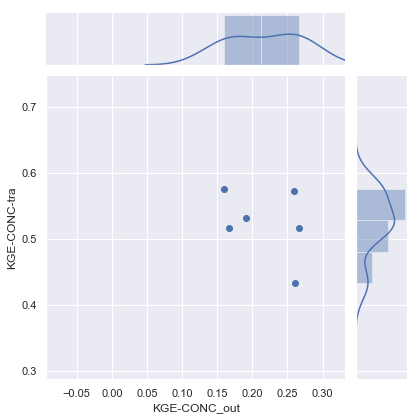

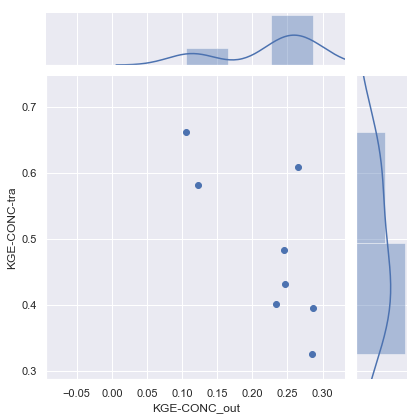

In [14]:
g = sns.JointGrid(x="KGE-CONC_out", y="KGE-CONC-tra", data=ff_c.loc[ff_c['Model']=="fix"], xlim=(xmin, xmax), ylim=(ymin,ymax))
g = g.plot(plt.scatter, sns.distplot)

g1 = sns.JointGrid(x="KGE-CONC_out", y="KGE-CONC-tra", data=ff_c.loc[ff_c['Model']=="var"], xlim=(xmin, xmax), ylim=(ymin,ymax))
g1= g1.plot(plt.scatter, sns.distplot)

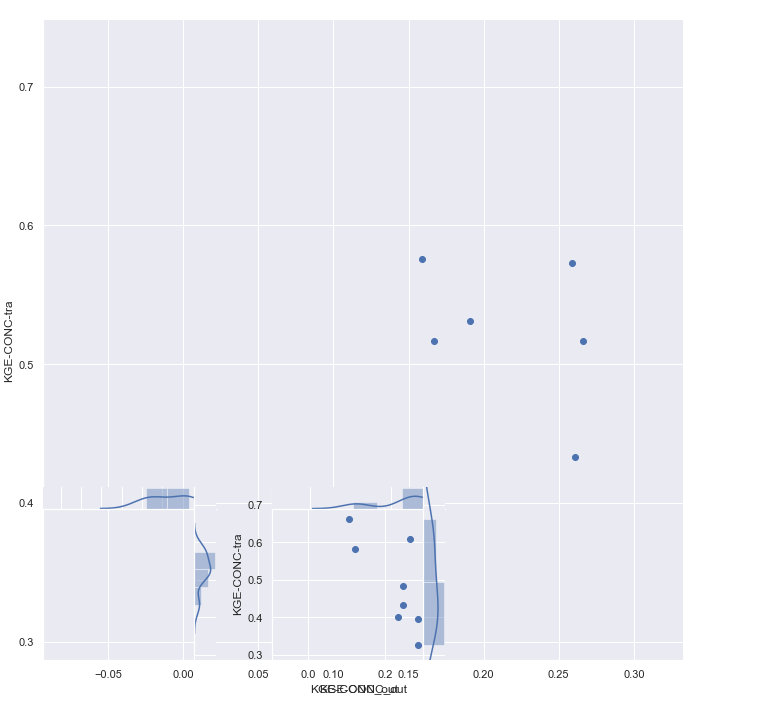

In [15]:
f = plt.figure()
for J in [g, g1]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)
        
# f.axes[0].set_position([0.1, 0.1, 0.38, 0.4]) # Left scatter
# f.axes[1].set_position([0.1, 0.45, 0.4, 0.05]) # Left-top hist
# f.axes[2].set_position([0.45, 0.1, 0.05, 0.4]) # Left-bott hist, (x-start, y-start, with-x, with-y)
# f.axes[3].set_position([0.63, 0.1, 0.38, 0.4]) # Right scatter
# f.axes[4].set_position([0.63, 0.45, 0.4, 0.05]) # Top right hist
# f.axes[5].set_position([0.98, 0.1, 0.05, 0.4]) # Right bott hist
# g.fig.axes

# test
f.axes[0].set_position([0.1, 0.1, 1.48, 1.48]) # Left scatter

f.axes[0].annotate('Kd vs DT50,\nequifinality',
            xy=(28, 170), xycoords='data',
            xytext=(-70, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='grey',
                            connectionstyle="arc3,rad=.6"))

f.axes[1].set_position([0.1, 0.45, 0.4, 0.05]) # Left-top hist
f.axes[2].set_position([0.45, 0.1, 0.05, 0.4]) # Left-bott hist, (x-start, y-start, with-x, with-y)
f.axes[3].set_position([0.63, 0.1, 0.38, 0.4]) # Right scatter
f.axes[4].set_position([0.63, 0.45, 0.4, 0.05]) # Top right hist
f.axes[5].set_position([0.98, 0.1, 0.05, 0.4]) # Right bott hist
# f.savefig("JointGrid.pdf")

In [52]:
3750-2571-1850

-671